In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import seaborn as sns
import nltk.corpus
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import re
import string
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import ipywidgets as widgets
import logging 
# import sys


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\slate\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# getting the stopwords that add little meaning to the text
stop_words = stopwords.words('english')
# getting punctuation
punc = string.punctuation

In [3]:
# reading in the two csv files:
# 1. 'financial_tweet_sentiment.csv'
df1 = pd.read_csv('financial_tweet_sentiment.csv')
# 2. stockerbot-export1.csv
df2 = pd.read_csv('stockerbot-export1.csv')

print('df1.shape[0] == df2.shape[0]')
df1.shape[0] == df2.shape[0]

df1.shape[0] == df2.shape[0]


True

### Concatenating  df1 and df2 to create dataframe df:

In [4]:
# concatenating the two 
df = pd.concat([df1,df2],axis=1)
# before removing unnecessary columns and 
df.head()

,cleaned_tweets,sentiment,id,text,timestamp,source,symbols,company_names,url,verified
0,video offic mind busi david solomon tell gs in...,0,1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE
1,price lumber lb f sinc hit ytd high maci turna...,0,1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE
2,say american dream dead,-1,1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE
3,barri silbert extrem optimist bitcoin predict ...,1,1.01972E+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE
4,satellit avoid attack space junk circl earth paid,-1,1.01972E+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE


### Checking for null values:

In [5]:
# checking data for null values
df.isnull().sum()

cleaned_tweets       6
sentiment            0
id                   0
text                 0
timestamp            2
source               3
symbols              3
company_names        5
url               6391
verified             4
dtype: int64

In [6]:
# removing 'url' column
df.drop('url',axis=1,inplace=True)
# removing other null values:
df.dropna(inplace=True)

In [7]:
# removing columns: verified,id,source,timestamp, and cleaned_tweets
df.drop(columns=['cleaned_tweets','verified','id','source','timestamp'],inplace=True)

In [8]:
# now I will take some measurements of the text data
# length of each text sample
df['text_len'] = df['text'].apply(lambda x: len(x))
# punctuation count for each text sample
def punc_count(text):
    count = 0
    for item in text:
        if item in string.punctuation:
            count += 1
    return count
df['punc_count'] = df['text'].apply(lambda x: punc_count(x))
# df.head(1)

# Sentiment Key
###  1 = Positive
###  0 = Neutral
### -1 = Negative

<AxesSubplot:xlabel='sentiment', ylabel='count'>

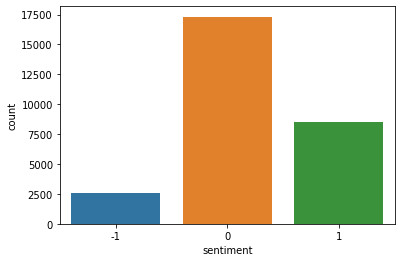

In [9]:
# the sentiment labels
sns.countplot(x='sentiment',data=df)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

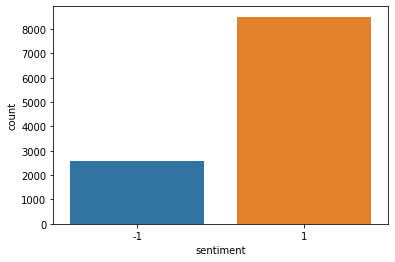

In [10]:
# dropping neutral sentiment:
df.drop(df[df['sentiment']==0].index,inplace=True)
sns.countplot(x='sentiment',data=df)

In [11]:
# seeing if there is any pattern with the 3 sentiment labels
# and text length
# but removing outliers

df.drop(df[df['text_len']<10].index,inplace=True)

In [12]:
# text length outlier removal
df.drop(df[df['text_len']>800].index,inplace=True)



### df.describe()

In [13]:
df.describe()

,sentiment,text_len,punc_count
count,11101.000000,11101.000000,11101.000000
mean,0.532294,117.018106,11.145212
std,0.846597,25.181935,5.358347
min,-1.000000,12.000000,1.000000
25%,1.000000,100.000000,7.000000
50%,1.000000,126.000000,10.000000
75%,1.000000,138.000000,14.000000
max,1.000000,159.000000,55.000000


### df.info( )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11101 entries, 2 to 28434
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      11101 non-null  int64 
 1   text           11101 non-null  object
 2   symbols        11101 non-null  object
 3   company_names  11101 non-null  object
 4   text_len       11101 non-null  int64 
 5   punc_count     11101 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 607.1+ KB


In [15]:
df.drop(df[df['text_len']<10].index,inplace=True)

### sentiment and text length, sns.violinplot( ... )

<AxesSubplot:xlabel='sentiment', ylabel='text_len'>

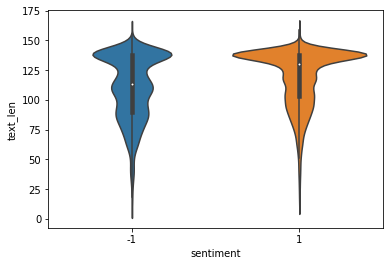

In [16]:
sns.violinplot(x='sentiment',y='text_len',data=df)
# perhaps notable trend here

In [17]:
# punctuation outliers removed
df.drop(df[df['punc_count']>1200].index,inplace=True)

### little if any correlation between punctuation and sentiment:

<AxesSubplot:xlabel='sentiment', ylabel='punc_count'>

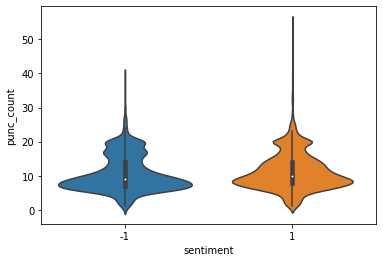

In [18]:
sns.violinplot(x='sentiment',y='punc_count',data=df)
# little variation observed

In [19]:
# now processing the text:
# removing stop words
df['cleaner_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [21]:
# and now dropping urls - 2 functions, 
# using regular expression module
def remove_url(text):
    return re.sub(r'http\S+','',text)

def remove_url_www(text):
    return re.sub(r'www\S+','',text)
df['cleaner_text'] = df['cleaner_text'].apply(lambda x: remove_url(x))

In [22]:
df['cleaner_text'] = df['cleaner_text'].apply(lambda x: remove_url_www(x))

### cleaner_text vs original

In [23]:
df[['cleaner_text','text']].head()

,cleaner_text,text
2,Who says American Dream dead?,Who says the American Dream is dead? https://t...
3,Barry Silbert extremely optimistic bitcoin -- ...,Barry Silbert is extremely optimistic on bitco...
4,How satellites avoid attacks space junk circli...,How satellites avoid attacks and space junk wh...
8,Senate wants emergency alerts go Netflix Spoti...,Senate wants emergency alerts to go out throug...
10,U.S. proposes expedited appeal fight AT&amp;T ...,U.S. proposes expedited appeal in fight with A...


In [24]:
# now using the NLTK tool kit to get sentiment scores
# initializing the SentimentIntesityAnalyzer
sia = SentimentIntensityAnalyzer()

### example sentiment scores for each text item:

In [25]:
# demonstration of sia in action:
for text in df['cleaner_text'].head(4):
    
    print('\n',text,'\n','*'*len(text))
    sent = sia.polarity_scores(text)
    for score in sent:
        print('{0}:{1} | '.format(score,sent[score]))


 Who says American Dream dead?  
 ******************************
neg:0.462 | 
neu:0.323 | 
pos:0.215 | 
compound:-0.5106 | 

 Barry Silbert extremely optimistic bitcoin -- predicts 99% new crypto entrants “going zero…  
 ********************************************************************************************
neg:0.0 | 
neu:0.822 | 
pos:0.178 | 
compound:0.3804 | 

 How satellites avoid attacks space junk circling Earth  #paid @Oracle  
 **********************************************************************
neg:0.389 | 
neu:0.611 | 
pos:0.0 | 
compound:-0.6249 | 

 Senate wants emergency alerts go Netflix Spotify etc.  @grg 
 ***********************************************************
neg:0.245 | 
neu:0.755 | 
pos:0.0 | 
compound:-0.3818 | 


In [26]:
# now to give every text element its own sentiment score 
# this will be in the form of a dictionary
# but really the only score we will be interested in 
# is the compound score:
df['sia_score'] = df['cleaner_text'].apply(lambda x: sia.polarity_scores(x))

###  df['sia_score'].head(3)

In [27]:
df['sia_score'].head(3)

2    {'neg': 0.462, 'neu': 0.323, 'pos': 0.215, 'co...
3    {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...
4    {'neg': 0.389, 'neu': 0.611, 'pos': 0.0, 'comp...
Name: sia_score, dtype: object

In [28]:
# now we are going to retrieve the compound score 
# and put it in its own column
# the sia_score is a dictionary
df['compound'] = df['sia_score'].apply(lambda x: x['compound'])

In [29]:
df.drop('sia_score',axis=1,inplace=True)

In [30]:
# dropping original text as its not needed
df.drop('text',axis=1,inplace=True)

### Distribution of the compound score

<AxesSubplot:xlabel='compound', ylabel='Count'>

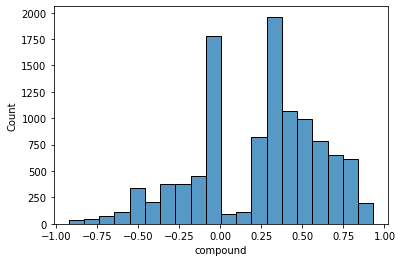

In [31]:
# taking a look of the distribution of the compound score
sns.histplot(df['compound'],bins=20)

In [32]:
def get_avg_compound(symbol):
    count = 0
    total_comp = 0.0
    for i in range(len(df)):
        if df.iloc[i].symbols == symbol:
            count +=1
            total_comp += df.iloc[i]['compound']
    return total_comp/count

In [33]:
def get_avg_sentiment(symbol):
    count = 0
    total_sent = 0.0
    for i in range(len(df)):
        if df.iloc[i].symbols == symbol:
            count += 1
            total_sent += df.iloc[i]['sentiment']
    if count > 0:
        return total_sent/count

In [34]:
symbols_15 = []
for x in df.symbols.head(10):
    symbols_15.append(x)

### Using a function we can see the average compound score for 10 stocks/cryptocurrencies with the most engagement:

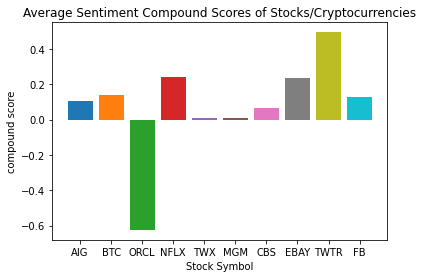

In [35]:
for x in symbols_15:
    plt.bar(x,get_avg_compound(x))
    plt.title("Average Sentiment Compound Scores of Stocks/Cryptocurrencies")
    plt.ylabel('compound score')
    plt.xlabel('Stock Symbol')

### Likewise we can see the average sentiment scores from the labeled sentiment data:

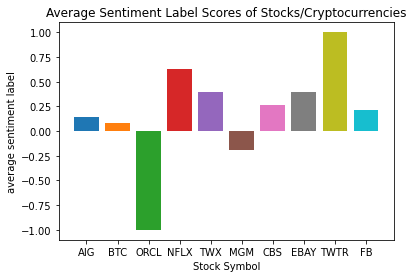

In [36]:
for x in symbols_15:
    plt.bar(x,get_avg_sentiment(x))
    plt.title("Average Sentiment Label Scores of Stocks/Cryptocurrencies")
    plt.ylabel('average sentiment label')
    plt.xlabel('Stock Symbol')

### The heatmap shows that our compound scores highly correlat with the sentiment labels, as the barplots above suggested
### Modest correlation with text lenght, but minimal with punctuation count

<AxesSubplot:>

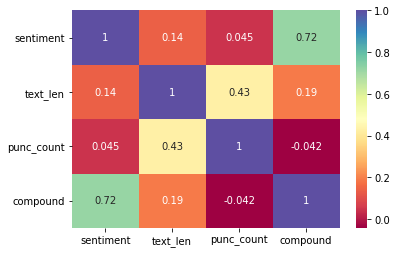

In [37]:
# now to look at a heatmap to see if we can see any patterns:
sns.heatmap(df.corr(),annot=True,cmap="Spectral")

In [38]:
# we can see that the sentiment compound score correlates very highly
# with the sentiment labels
# text length shows a small amount of correlation to sentiment
# punctuation count does not any significant correlation to sentiment
#therefore we can remove punc_count
df.drop('punc_count',axis=1,inplace=True)

In [39]:
#adding a column to make the categorical sentiment score more clear
df['pos_neg'] = df['sentiment'].apply(lambda x: 'Positive' if x>0 else 'Negative')

### The standard deviation of the compound scores by sentiment label

<AxesSubplot:xlabel='compound', ylabel='pos_neg'>

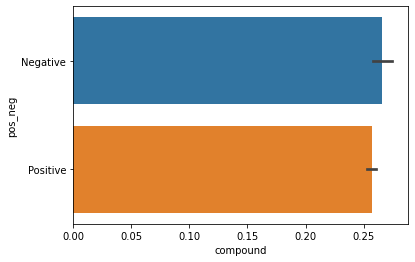

In [40]:
# now looking at standard deviation of compound by sentiment score
sns.barplot(x='compound',y='pos_neg',data=df,estimator=np.std)

<AxesSubplot:xlabel='pos_neg', ylabel='text_len'>

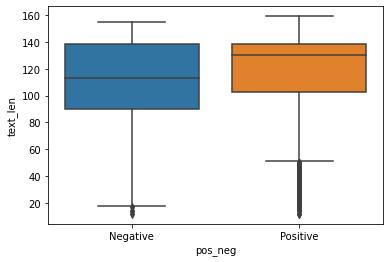

In [41]:
sns.boxplot(x='pos_neg',y='text_len',data=df)
# shows minor variation

### The current dataset before training the model

In [42]:
df.head()

,sentiment,symbols,company_names,text_len,cleaner_text,compound,pos_neg
2,-1,AIG,American,60,Who says American Dream dead?,-0.5106,Negative
3,1,BTC,Bitcoin,140,Barry Silbert extremely optimistic bitcoin -- ...,0.3804,Positive
4,-1,ORCL,Oracle,130,How satellites avoid attacks space junk circli...,-0.6249,Negative
8,1,NFLX,Netflix,100,Senate wants emergency alerts go Netflix Spoti...,-0.3818,Positive
10,-1,TWX,Time Warner,127,U.S. proposes expedited appeal fight AT&amp;T ...,-0.3818,Negative


### a pairplot: The hue = pos_neg values:

C:\Users\slate\anaconda33\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


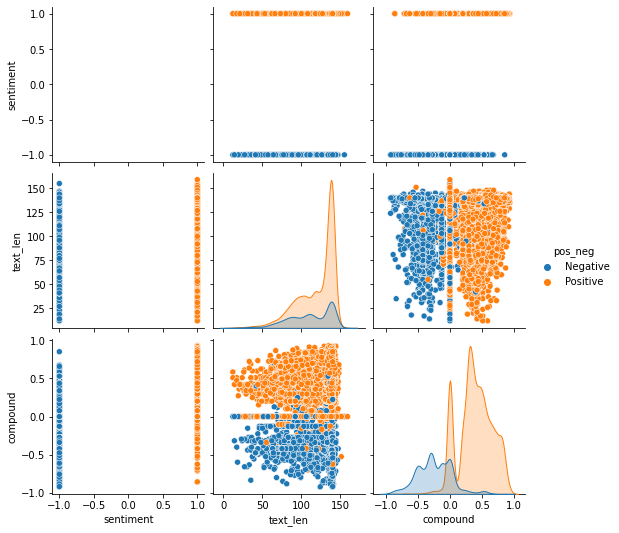

In [43]:
sns.pairplot(df,hue='pos_neg')



### the plot above shows only slight correlation between text length and sentiment values

In [51]:

# X will represent the independent variables
X = df[['text_len','compound']]
# y is the dependent variable
y = df['sentiment']


In [49]:
# now to get our training and testing data split up
# the test size will be 30%
# the random_state is arbitrary
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=13)

In [52]:
# now to begin training the data 
# initializing the LogisticRegression model
log_reg = LogisticRegression()

### The Classification Report:

In [54]:
log_reg.fit(X_train,y_train)
predictions = log_reg.predict(X_test)

In [55]:
# getting the predictions off of the test data
# predictions = log_reg.predict(X_test)
# then we'll compare with the accuracy, precision, and F1 scores
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.95      0.73      0.83       770
           1       0.92      0.99      0.96      2561

    accuracy                           0.93      3331
   macro avg       0.94      0.86      0.89      3331
weighted avg       0.93      0.93      0.93      3331



### The Confusion Matrix: as dataframe and heatmap

In [58]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['Pos','Neg'],columns=['Pos','Neg'])
conf_matrix

,Pos,Neg
Pos,561,209
Neg,29,2532


Text(33.0, 0.5, 'Test Set')

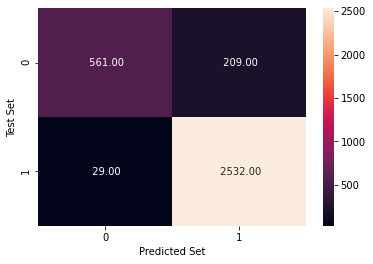

In [59]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt=' .2f')
plt.xlabel("Predicted Set")
plt.ylabel("Test Set")

### The Accuracy Score

In [60]:
metrics.accuracy_score(y_test,predictions)

0.9285499849894926

### Regression plot

<AxesSubplot:ylabel='sentiment'>

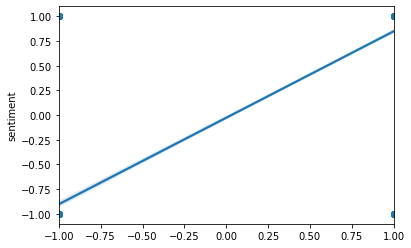

In [61]:
sns.regplot(x=predictions,y=y_test,data=df)

In [66]:
def get_comp(x):
    score = sia.polarity_scores(x)
    # returns the value of the key 'compound'
    return score['compound']

def get_polarity(text):
#     text = input("Enter sentence: \n\nYour sentence:\n")
    if type(text) == str:
        text_len = len(text)
        comp = get_comp(text)

        test = [[text_len,comp]]
        pred = log_reg.predict(test)
#         print("Entered Text: ",text)
        if pred == 1:
            return "Positive"
        else:
            return "Negative"
    else:
        logging.basicConfig(filename='logger.log',
                   level=logging.INFO)
        logging.info("Invalid Entry was recorded")
        return "Please enter a sentence for me to predict."
        get_polarity()

### Enter a sentence into the text field below to see its predicted sentiment polarity:


In [67]:
text = widgets.Textarea()
text_output = widgets.Textarea()
output_label = widgets.Label("Predicted Polarity: ")
output_label2 = widgets.Label()
output_label3 = widgets.Label()

enter_button = widgets.Button(description='Enter Sentence',button_style='success')
def on_button_clicked(x):
    
    x = text.value
    output_label3.value = x
    
    output_label2.value = get_polarity(x)
#     display("Entered sentence: ",text.value)
    display(output_label2)
#     display(output_label)
#     display(text_output)
display(text,enter_button)
display(output_label3)
display(output_label,output_label2)
# display(text_ouput)
enter_button.on_click(on_button_clicked)
# logging.setLevel(logging.DEBUG)

Textarea(value='')

Button(button_style='success', description='Enter Sentence', style=ButtonStyle())

Label(value='')

Label(value='Predicted Polarity: ')

Label(value='')